In [5]:
%pylab inline
import warnings
import numpy as np
import matplotlib.pyplot as plt

import rayopt as ro

# ignore matplotlib and numpy warning each other
warnings.simplefilter("ignore", FutureWarning)
# ignore floating point exceptions
np.seterr(divide="ignore", invalid="ignore")
# by default only print 4 significant digits
np.set_printoptions(precision=4)

Populating the interactive namespace from numpy and matplotlib


In [88]:
# It appears that rayopt requires distance rather than
# thickness quoted in patent literature
# So we have to move the thickness value one row down
# 
# The first surface represents the Object (O)
# The last surface represents the Image (I)

description = "Canon-RF-50mmf1.2-US20190265441A1"
columns = "type roc distance diameter material"
text = """
O 0             20.0    50.0 AIR
S 80.11         10.0    40.0 1.804/46.58
S -68.243       9.67    40.0 1.68893/31.07
S 52.862        1.64    40.0 AIR
S 42.184        0.2     37.0 2.001/29.13
S 2510.58       7.47    37.0 AIR
S 99.979        0.7     35.0 1.65412/39.68
S 24.508        1.6     35.0 AIR
S -101.919      7.45    33.0 1.66565/35.64
S 34.799        1.34    33.0 1.95375/32.32
S 516.053       5.56    33.0 AIR
A 0             2.44    32.0 AIR
S -1398.232     2.58    33.0 1.497/81.54
S -20.985       10.02   33.0 1.738/32.26
S 251.143       1.29    33.0 AIR
S 87.566        0.44    34.0 1.76385/48.51
S -43.447       7.29    34.0 1.66565/35.64
S 105.692       1.28    34.0 AIR
S 161.695       1.79    37.0 1.883/40.8
S -42.423       7.96    37.0 AIR
S 54.474        1.95    38.0 1.883/40.8
S -60.531       8.77    38.0 1.59551/39.24
S 40.56         1.54    38.0 AIR
S -58.170       7.14    36.5 1.673/38.15
S 105.985       1.21    36.5 1.804/46.58
S -216.191      5.08    36.5 AIR
I 0             14.6    43.2 AIR
"""

In [89]:
s = ro.system_from_text(text, columns.split(), description=description)
s.object.angle = np.deg2rad(22)
s.fields = 0, .7, 1.

s[1].conic = 0.00E+00
s[1].aspherics = [0, -1.44652e-6, -1.02693e-9, 1.91678e-12, -3.07794e-15, 2.00476e-18 ]
s[18].conic = 0.00E+00
s[18].aspherics = [0, -2.17027e-6, 4.00496e-9, -1.90948e-11, 4.86536e-14, -4.89586e-17 ]
s[25].conic = 0.00E+00
s[25].aspherics = [0, 3.50064e-6, -5.98670e-10, 1.34319e-11, -2.56798e-14, 2.59930e-17 ]

In [90]:
s.update()
#s.paraxial.resize()
print(s)

System: Canon-RF-50mmf1.2-US20190265441A1
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 22 deg
 Pupil:
   Pupil Distance: 46.3747
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 21.4742
Image:
 Radius: 21.6
 Update Radius: True
 Pupil:
   Pupil Distance: -64.6214
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 27.1503
Stop: 11
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S         20        inf         50         basic/air   1.000   1.000   89.30
 1 S         10      80.11         40                 -   1.804   1.804   46.58
 2 S       9.67     -68.24         40                 -   1.689   1.689   31.07
 3 S       1.64      52.86         40         basic/air   1.000   1.000   89.30
 4 S        0.2      42.18         37                 -   2.001   2.001   29.13
 5 S       7.47       2511         37         basic/air   1.000   1.000   89.30
 6 S        0.7      99.98        

System: Canon-RF-50mmf1.2-US20190265441A1
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 22 deg
 Pupil:
   Pupil Distance: 46.3747
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 21.4742
Image:
 Radius: 21.6
 Update Radius: True
 Pupil:
   Pupil Distance: -64.6214
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 27.1503
Stop: 11
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S         20        inf         50         basic/air   1.000   1.000   89.30
 1 S         10      80.11         40                 -   1.804   1.804   46.58
 2 S       9.67     -68.24         40                 -   1.689   1.689   31.07
 3 S       1.64      52.86         40         basic/air   1.000   1.000   89.30
 4 S        0.2      42.18         37                 -   2.001   2.001   29.13
 5 S       7.47       2511         37         basic/air   1.000   1.000   89.30
 6 S        0.7      99.98        

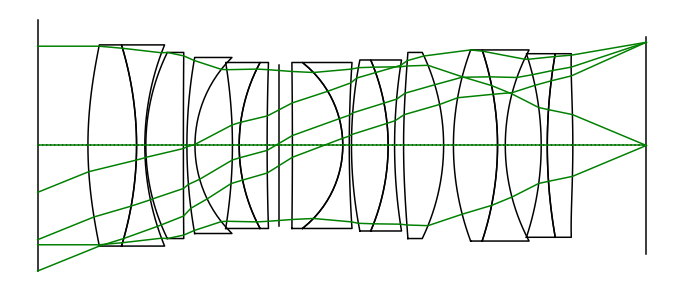

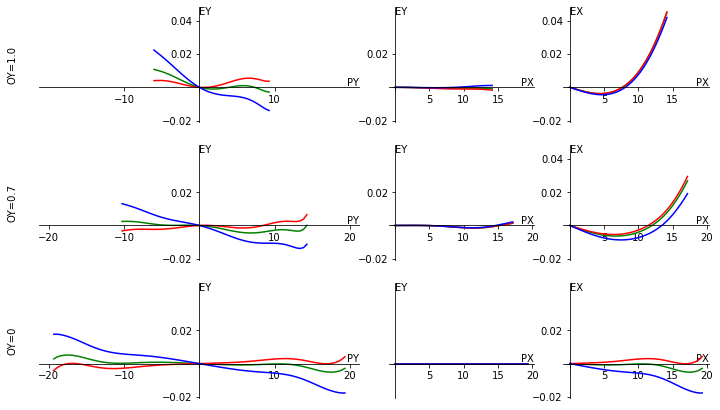

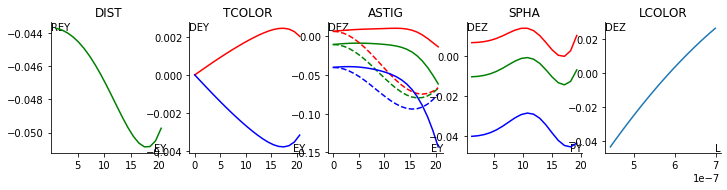

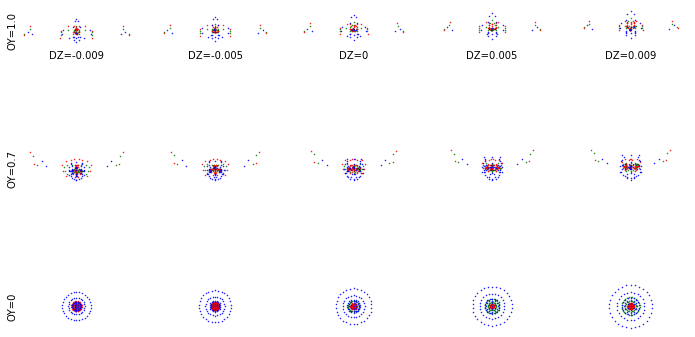

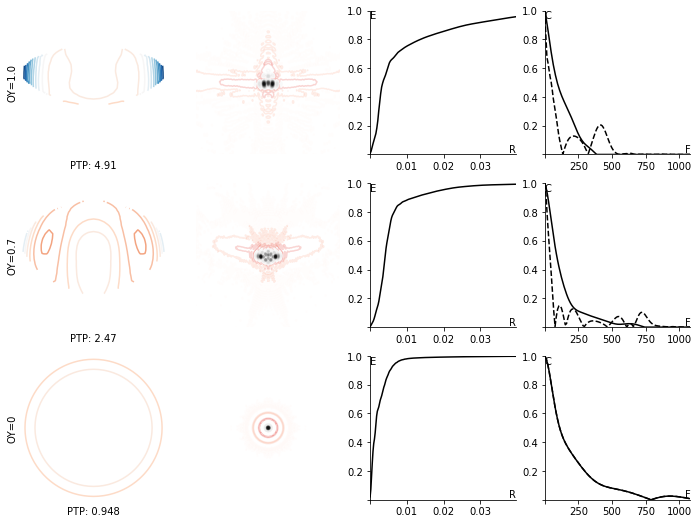

In [91]:
ro.Analysis(s)